In [126]:
import numpy as np
import tifffile as tff
import read_roi as rr

%matplotlib inline 
import matplotlib.pyplot as plt

In [317]:
def read_image(path):
    tif = tff.TiffFile(path)
    
    pages = []
    for page in tif.pages:
        array = page.asarray()
        pages.append(array)
        
    return np.array(pages)
        
def read_roi(path):
    return rr.read_roi_zip(path)

def extract_roi(roi):
    y0 = roi['left']
    x0 = roi['top']
    w = roi['width']
    h = roi['height']
    
    return x0, y0, w, h


def average_over_roi(img, roi):
    vals = np.zeros((img.shape[0],1))
    x0, y0, w, h = extract_roi(roi)
    
    for z in range(img.shape[0]):
        vals[z] = np.max(img[z, x0:x0+w, y0:y0+h])
        
    return vals

def overlay_roi_im(img, roi, index = 0, value = 1):
    arr = np.copy(img[index,...])
    x0, y0, w, h = extract_roi(roi)
    
    for x in range(w):
        arr[x0+x,y0] = value
        arr[x0+x,y0+h] = value
        
    for y in range(h):
        arr[x0,y0+y] = value
        arr[x0+w,y0+y] = value
    
    return arr

def plot_frames(vals):
    n = len(vals)
    
    t = []
    rec = []
    for i in range(n):
        t.append(i)
        t.append(i+1)
        rec.append(vals[i])
        rec.append(vals[i])
    
    plt.figure()
    plt.plot(t, rec, '-')
    
def split_pattern(vals, pattern):
    np_indices = []
    split = []
    filt = [s == '1' for s in pattern]
    
    n = len(filt)
    m = len(vals)
    
    quo = m//n
    for i in range(quo):
        ind = np.where(filt)
        filtered = vals[i*n:(i+1)*n][ind]
        
        split.append(filtered)
        np_indices.append(ind)
        
    rem = m%n
    if not rem == 0:
        ind = np.where(filt[:rem])
        filtered = vals[quo*n:][np.where(filt[:rem])]
        
        split.append(filtered)
        np_indices.append(ind)
        
    indices = []
    for i, ind in enumerate(np_indices):
        indices.extend((i*n+ind[0]).tolist())
        
    return np.concatenate(split, axis = 0), indices
    
def plot_overlays_intensity(img, rois, offset = 0, patterns = []):
    for i, k in enumerate(rois.keys()):

        plt.figure(figsize=(15, 15))
        for j in range(len(rois.keys())):
            plt.subplot(1, len(rois.keys()), j+1)
            plt.imshow(overlay_roi_im(img, rois[k], offset+j))

        av = average_over_roi(img, roi)
        
        if len(patterns) == 0:
            plt.figure()
            plt.plot([i for i in range(av.shape[0])], av, '.')
        else:
            plt.figure()
            for p in patterns:
                a_filt, ind = split_pattern(av[offset:], p)
                plt.plot(ind, a_filt, '.')

## Multi-color with interleaved excitation

blahblah `asd`

In [318]:
root = '211209_PH_xPH007_multi-color_interleaved/'
folder = '21_Sample4_Nup96-646_Tub-488_Tom20-CF568_488i1p500_561i1p4k_640i1_quadfilter-only_x25_1/'
file = '21_Sample4_Nup96-646_Tub-488_Tom20-CF568_488i1p500_561i1p4k_640i1_quadfilter-only_x25_1_MMStack_Pos0.ome.tif'

    
f = root+folder+file
im = read_image(f)
print(im.shape)

(200, 239, 239)


In [319]:
file = 'RoiSet_21.zip'

rois = read_roi(root+file)
print(rois)

OrderedDict([('0005-0119-0111', {'type': 'rectangle', 'left': 103, 'top': 111, 'width': 17, 'height': 17, 'arc_size': 0, 'name': '0005-0119-0111', 'position': 5}), ('0007-0159-0134', {'type': 'rectangle', 'left': 126, 'top': 151, 'width': 17, 'height': 17, 'arc_size': 0, 'name': '0007-0159-0134', 'position': 7}), ('0015-0157-0162', {'type': 'rectangle', 'left': 154, 'top': 149, 'width': 17, 'height': 17, 'arc_size': 0, 'name': '0015-0157-0162', 'position': 15})])


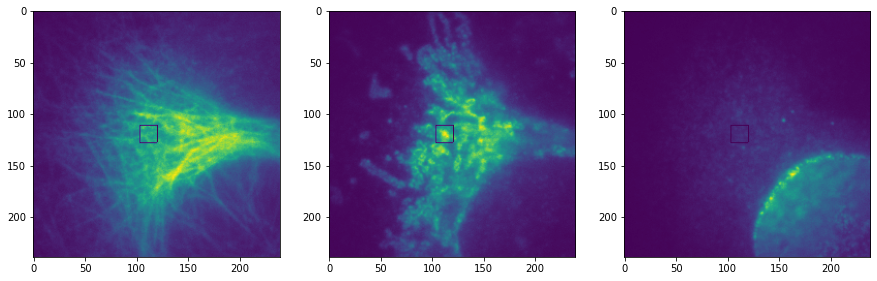

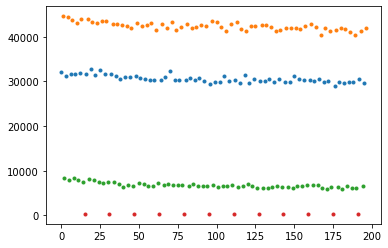

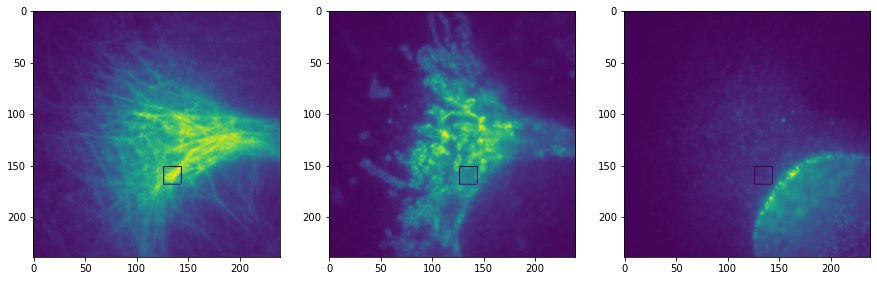

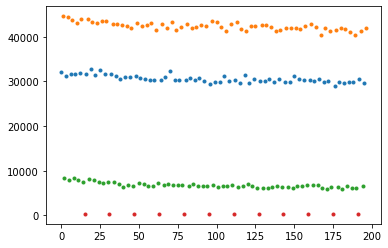

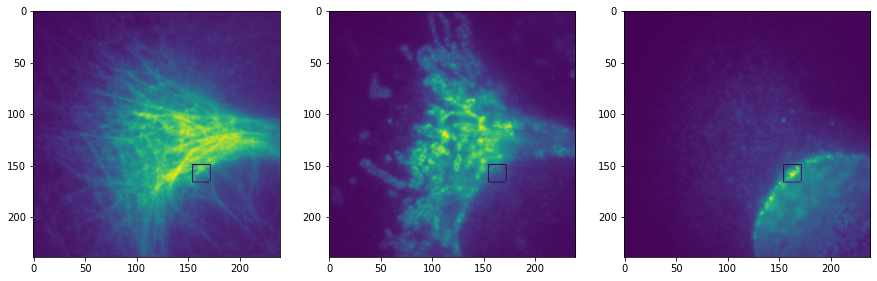

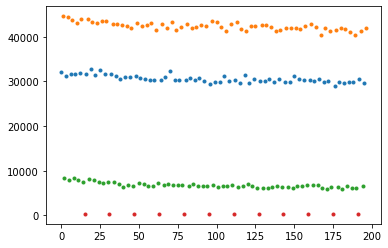

In [322]:
patterns = ['1001001001001000','0100100100100100','0010010010010010','0000000000000001']
plot_overlays_intensity(im[3:,...], rois, patterns = patterns)

In [231]:
root = '211209_PH_xPH007_multi-color_interleaved/'
folder = '32_Sample4-DAPI_Nup96-646_Tub-488_Tom20-CF568_405i1p7k_488i1p500_561i1p1800_640i1_quadfilter-only_x25_1/'
file = '32_Sample4-DAPI_Nup96-646_Tub-488_Tom20-CF568_405i1p7k_488i1p500_561i1p1800_640i1_quadfilter-only_x25_1_MMStack_Pos0.ome.tif'

    
f = root+folder+file
im = read_image(f)
print(im.shape)

(200, 245, 245)


In [196]:
file = 'RoiSet_32.zip'

rois = read_roi(root+file)
print(rois)

OrderedDict([('0005-0119-0111', {'type': 'rectangle', 'left': 56, 'top': 91, 'width': 17, 'height': 17, 'arc_size': 0, 'name': '0005-0119-0111', 'position': 8}), ('0009-0049-0138', {'type': 'rectangle', 'left': 130, 'top': 41, 'width': 17, 'height': 17, 'arc_size': 0, 'name': '0009-0049-0138', 'position': 9}), ('0011-0135-0123', {'type': 'rectangle', 'left': 115, 'top': 127, 'width': 17, 'height': 17, 'arc_size': 0, 'name': '0011-0135-0123', 'position': 11}), ('0010-0143-0089', {'type': 'rectangle', 'left': 81, 'top': 135, 'width': 17, 'height': 17, 'arc_size': 0, 'name': '0010-0143-0089', 'position': 10})])


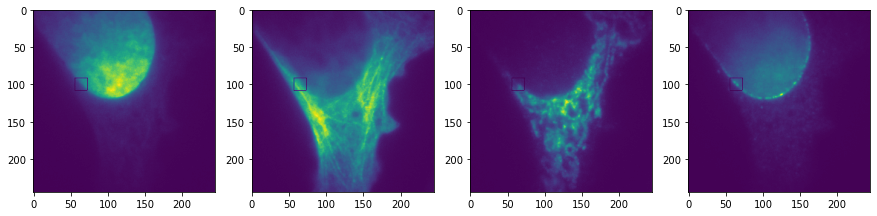

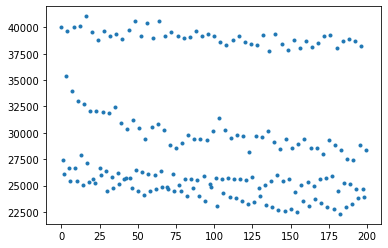

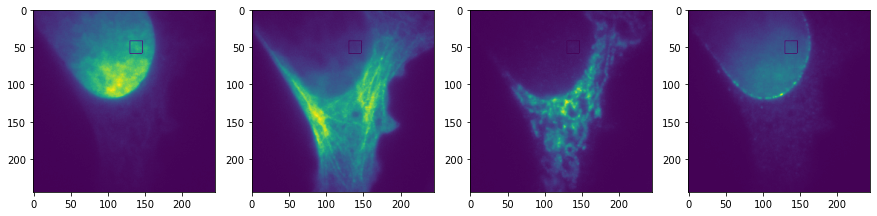

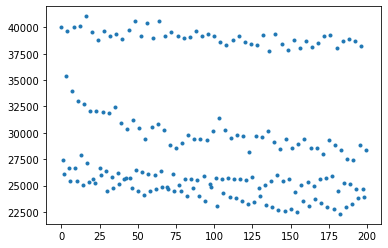

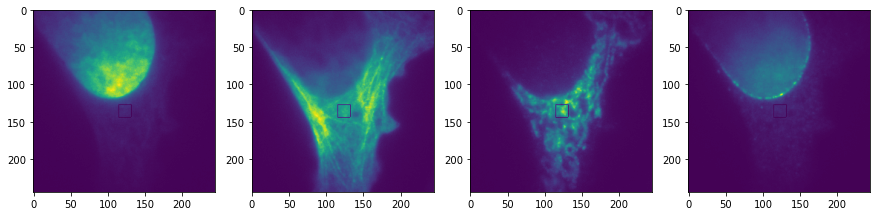

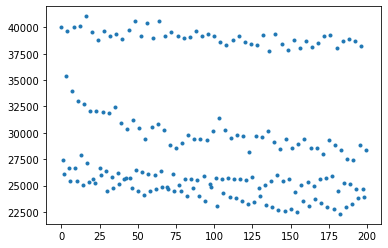

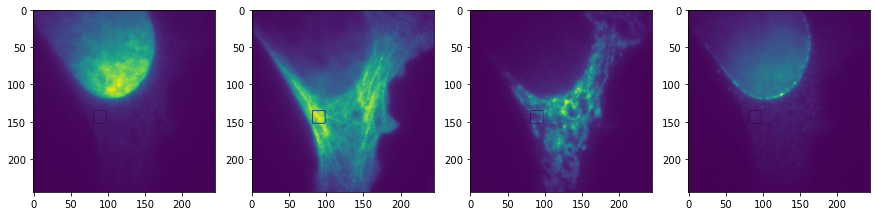

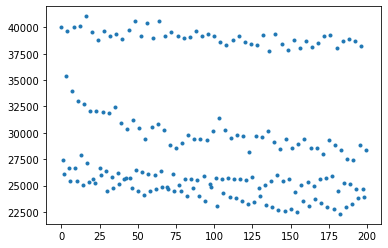

In [197]:
for i, k in enumerate(rois.keys()):
    
    plt.figure(figsize=(15, 15))
    for j in range(len(rois.keys())):
        plt.subplot(1, len(rois.keys()), j+1)
        plt.imshow(overlay_roi_im(im, rois[k], j))
        
    av = average_over_roi(im, roi)
    plt.figure()
    plt.plot([i for i in range(av.shape[0])], av, '.')

In [316]:
a=np.array([1,2,3,4,5,6,7,8,9,10])
p = '011'

a, b = split_pattern(a, p)
print(a)
print(b)


[2 3 5 6 8 9]
[1, 2, 4, 5, 7, 8]
